In [1]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# StandardScaler from Scikit-Learn
from sklearn.preprocessing import StandardScaler

# PCA from Scikit-Learn
from sklearn.decomposition import PCA

# Scikit-Learn's KMeans algorithm
from sklearn.cluster import KMeans

# Adjusted Rand index
from sklearn.metrics import adjusted_rand_score

In [2]:
df=pd.read_csv('int.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583.0,France


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


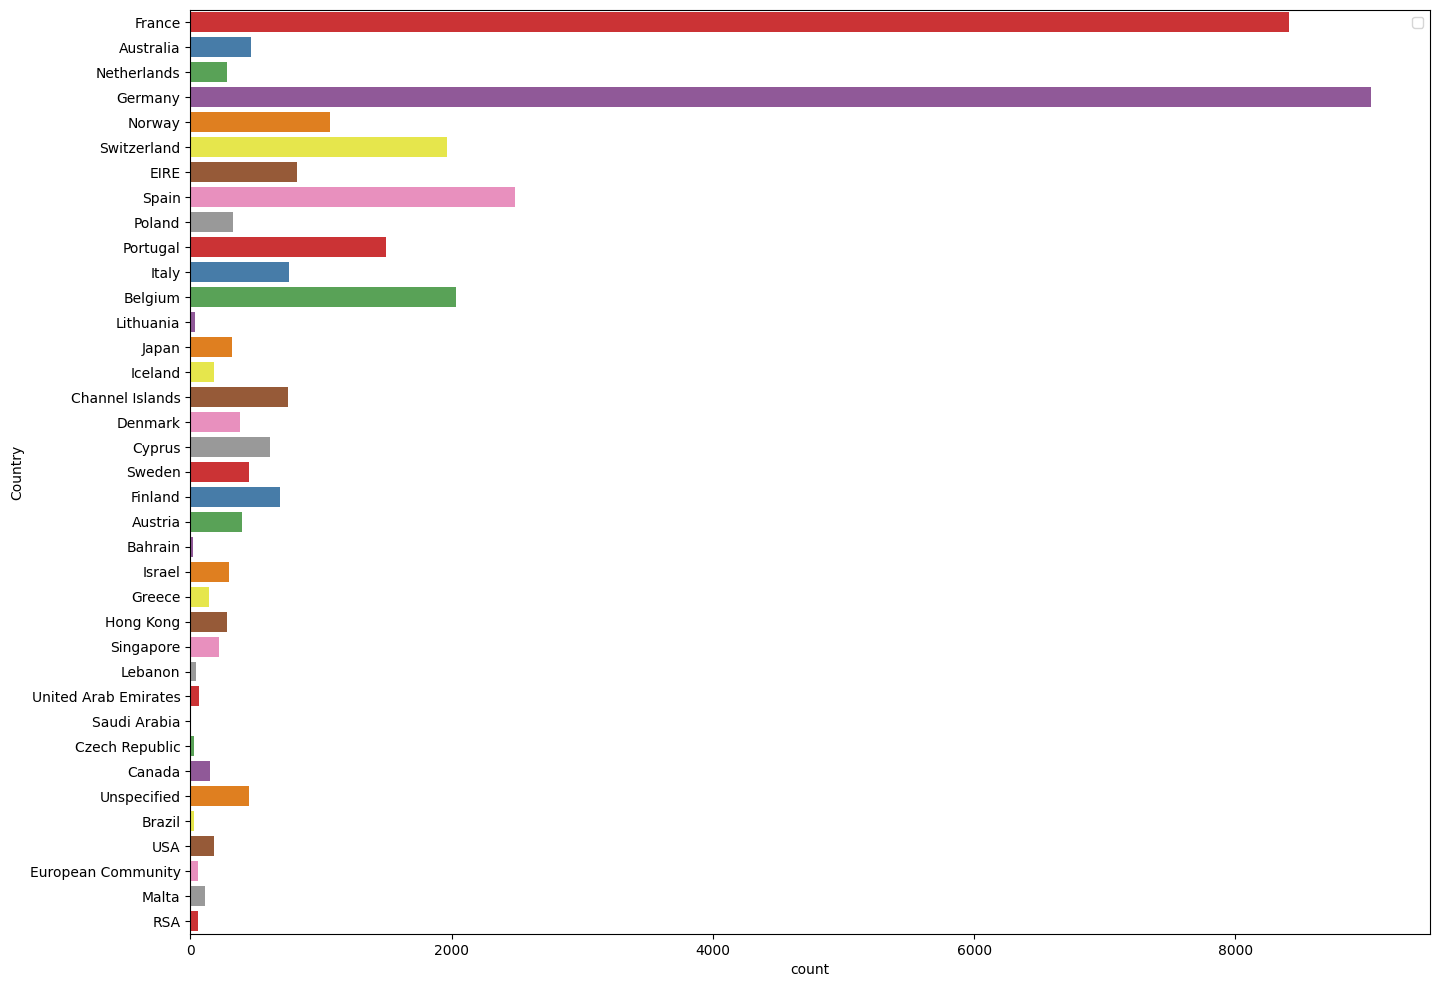

In [11]:
plt.figure(figsize=(16,12))
sns.countplot(df,y='Country',palette='Set1')
plt.legend()
plt.show()

In [13]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1418
Country           0
dtype: int64

In [16]:
df.dropna(inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [19]:
df['CustomerID']=df['CustomerID'].astype('int')

In [20]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583,France


In [21]:
df['total']=df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France,90.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France,90.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583,France,45.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583,France,10.2
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583,France,15.6


In [24]:
inv=df['InvoiceNo'].unique()
df.to_csv('cleaned.csv',index=None)

In [26]:
df['InvoiceNo'].nunique()
df['CustomerID'].nunique()

414

In [32]:
invoice=df.groupby(by='CustomerID')['InvoiceNo'].nunique()
type(invoice)
invoice=pd.DataFrame(invoice)
invoice

#invoice gives the frequeny of the customer
                                    
                                    

,InvoiceNo
CustomerID,
12347,7
12348,4
12349,1
12350,1
12352,8
...,...
17444,3
17508,1
17828,4


We got the frequency of the customer transactions for each customer. Similarly we should get the amount spent by them in each transaction.

In [37]:
#aggregate product data
sales_data=df.groupby('CustomerID').total.agg(total_amt=('sum'),average=('mean'))
sales_data.head()


,total_amt,average
CustomerID,,
12347,4310.00,23.681319
12348,1797.24,57.975484
12349,1757.55,24.076027
12350,334.40,19.670588
12352,2506.04,29.482824


In [74]:
new=pd.concat([invoice,sales_data],axis=1).reset_index()
new

,CustomerID,InvoiceNo,total_amt,average
0,12347,7,4310.00,23.681319
1,12348,4,1797.24,57.975484
2,12349,1,1757.55,24.076027
3,12350,1,334.40,19.670588
4,12352,8,2506.04,29.482824
...,...,...,...,...
409,17444,3,2940.04,21.778074
410,17508,1,387.31,17.605000
411,17828,4,1820.09,27.165522
412,17829,1,889.24,29.641333


The other main features include recent visit, first visit, average basket size,etc

In [75]:
new2=df.groupby('CustomerID')['Quantity'].agg(Avg_basket='sum').reset_index()
new2

,CustomerID,Avg_basket
0,12347,2458
1,12348,2341
2,12349,631
3,12350,197
4,12352,536
...,...,...
409,17444,2119
410,17508,289
411,17828,667
412,17829,496


In [81]:
neww=pd.concat([new,new2['Avg_basket']],axis=1).reset_index()
neww.head()


,index,CustomerID,InvoiceNo,total_amt,average,Avg_basket
0,0,12347,7,4310.00,23.681319,2458
1,1,12348,4,1797.24,57.975484,2341
2,2,12349,1,1757.55,24.076027,631
3,3,12350,1,334.40,19.670588,197
4,4,12352,8,2506.04,29.482824,536


In [83]:
neww.drop(['index'],axis=1,inplace=True)
neww.head()

,CustomerID,InvoiceNo,total_amt,average,Avg_basket
0,12347,7,4310.00,23.681319,2458
1,12348,4,1797.24,57.975484,2341
2,12349,1,1757.55,24.076027,631
3,12350,1,334.40,19.670588,197
4,12352,8,2506.04,29.482824,536


In [85]:
neww['Avgbas']=neww['Avg_basket']/neww['InvoiceNo']
neww.head()

,CustomerID,InvoiceNo,total_amt,average,Avg_basket,Avgbas
0,12347,7,4310.00,23.681319,2458,351.142857
1,12348,4,1797.24,57.975484,2341,585.250000
2,12349,1,1757.55,24.076027,631,631.000000
3,12350,1,334.40,19.670588,197,197.000000
4,12352,8,2506.04,29.482824,536,67.000000


In [ ]:
neww.index=neww['CustomerID']

,CustomerID,InvoiceNo,total_amt,average,Avg_basket,Avgbas
CustomerID,,,,,,
12347,12347,7,4310.00,23.681319,2458,351.142857
12348,12348,4,1797.24,57.975484,2341,585.250000
12349,12349,1,1757.55,24.076027,631,631.000000
12350,12350,1,334.40,19.670588,197,197.000000
12352,12352,8,2506.04,29.482824,536,67.000000
...,...,...,...,...,...,...
17444,17444,3,2940.04,21.778074,2119,706.333333
17508,17508,1,387.31,17.605000,289,289.000000
17828,17828,4,1820.09,27.165522,667,166.750000


In [ ]:
neww.drop(['CustomerID'],axis=1,inplace=True)


In [90]:
neww.head()

,InvoiceNo,total_amt,average,Avg_basket,Avgbas
CustomerID,,,,,
12347,7,4310.00,23.681319,2458,351.142857
12348,4,1797.24,57.975484,2341,585.250000
12349,1,1757.55,24.076027,631,631.000000
12350,1,334.40,19.670588,197,197.000000
12352,8,2506.04,29.482824,536,67.000000


In [92]:
neww.columns

Index(['InvoiceNo', 'total_amt', 'average', 'Avg_basket', 'Avgbas'], dtype='object')

In [104]:
neww['total_amt'].to_numpy()

array([ 4310.  ,  1797.24,  1757.55,   334.4 ,  2506.04,    89.  ,
        1079.4 ,   459.4 ,  2811.43,  6207.67,  1168.06,  6372.58,
        2662.06,   189.9 ,  5226.23,   552.  ,  1313.1 ,   641.38,
         168.9 ,  3545.69,  1887.96,  1298.04,   364.6 ,   742.93,
         457.5 ,  1628.12,  4008.62,   852.24,  2724.81,  1845.31,
        1850.56,   585.27,   401.9 ,  2780.66,   549.84,   460.89,
        1582.6 ,  1272.48,  3018.63,  2409.9 ,  1635.66,  1108.65,
          84.3 ,   225.6 ,   427.7 ,  1710.39,  3415.3 ,  1708.12,
        2888.55, 11072.67,   693.33,  1226.88,   758.1 ,   562.41,
        3649.1 ,   668.58,   600.39,   807.04,   803.56,  1859.31,
        1760.96,   777.2 ,   582.73,   825.8 ,  7956.46,  3750.4 ,
         256.4 ,  6487.45,  5059.32, 13375.87,   806.14,  7829.89,
         509.01,  4951.41,  2906.85,   173.55,   172.06,  5005.46,
         133.4 ,  1002.31,   476.49,   449.45,  4067.29,   197.88,
        9035.52,   430.57,   707.09,  3528.34,  2466.86,  3181

In [105]:
scaler = StandardScaler()
cols = ['total_amt', 'average', 'Avg_basket', 'Avgbas']

# Extract the data to scale
sc = neww[cols]  # shape: (n_samples, 4)

# Scale all columns at once
x = scaler.fit_transform(sc)

# Convert back to DataFrame (optional)
scaled_df = pd.DataFrame(x, columns=cols)

In [109]:
scaled_df

,total_amt,average,Avg_basket,Avgbas
0,0.589115,-0.158315,0.561105,0.043142
1,-0.133880,0.292248,0.508736,0.639649
2,-0.145300,-0.153130,-0.256669,0.756220
3,-0.554783,-0.211009,-0.450930,-0.349616
4,0.070062,-0.082094,-0.299192,-0.680857
...,...,...,...,...
409,0.194937,-0.183321,0.409367,0.948170
410,-0.539559,-0.238147,-0.409750,-0.115199
411,-0.127306,-0.112539,-0.240555,-0.426693
412,-0.395139,-0.080012,-0.317096,0.412239


We need to find the optimal number of clusters to be classified into

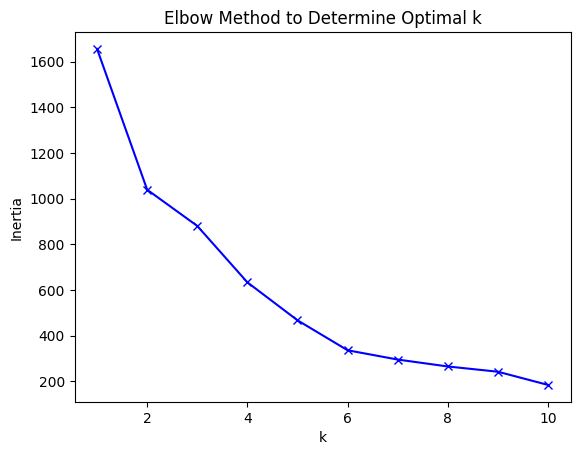

In [110]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)  # 'x' is your scaled feature array
    inertia.append(kmeans.inertia_)  # sum of squared distances

plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.show()


We get the elbow at 6


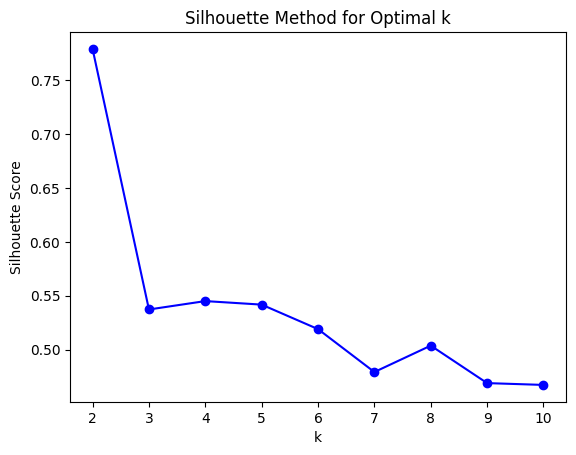

In [111]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

silhouette_scores = []
K = range(2, 11)  # start from 2 since silhouette is undefined for k=1

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(x)
    score = silhouette_score(x, labels)
    silhouette_scores.append(score)

# Plot
import matplotlib.pyplot as plt
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()



In [123]:
mod=KMeans(n_clusters=3,init="k-means++",random_state=123)
mod.fit(x)
neww['cluster']=mod.fit_predict(x)



In [124]:
neww['cluster'].nunique()

3

In [126]:
neww.columns

Index(['InvoiceNo', 'total_amt', 'average', 'Avg_basket', 'Avgbas', 'cluster'], dtype='object')

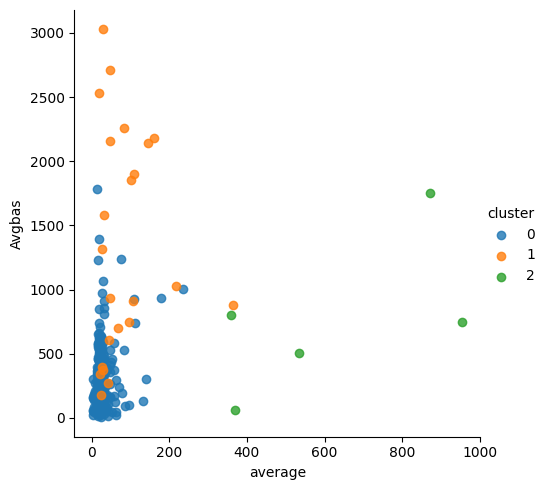

In [127]:
sns.lmplot(data=neww,x='average',y='Avgbas',hue='cluster',fit_reg=False)

0.779183026516123


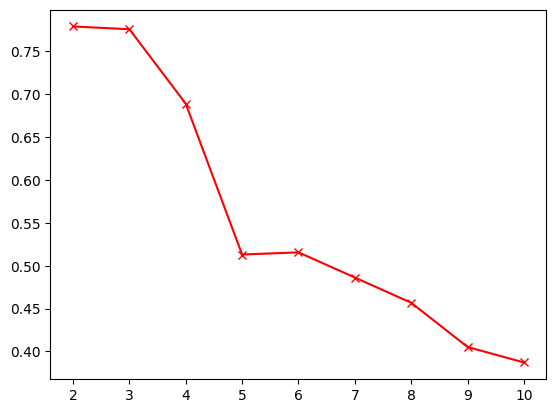

In [135]:
#finding the best cluster no.
scores=[]
k=range(2,11)

for i in k:
    mod=KMeans(n_clusters=i,random_state=123,init='k-means++')
    lab=mod.fit_predict(x)
    pred=silhouette_score(x,lab)
    scores.append(pred)
print(max(scores))
plt.plot(k,scores,'rx-')